# Zadanie 1

# Przygotowania:


## Na początku należy zaimportować potrzebne biblioteki

In [1]:
import numpy as np                 # import biblioteki numpy
import matplotlib.pyplot as plt    # import 
from random import uniform         # import metody uniform

##  Współrzędne wektora wyznaczone przez punkty A i B

In [2]:
A = [-1, 0]
B = [1, 0.1]

## Deklaracja wartości tolerancji

In [3]:
tolerances = [1e-18, 1e-14, 1e-10]
tol_string = ['1e-18', '1e-14', '1e-10']

## Deklaracja kolorów

In [4]:
colors_categories = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])

## Własne implementacje obliczania wyznaczników macierzy 2x2 oraz 3x3

In [5]:
det_names = ["2x2 numpy", "2x2 własna imp.", "3x3 numpy", "3x3 własna imp."]

# det_2_x_2 przyjmuje jako argument macierz o wymiarach 2x2
def det_2_x_2(M):
    return M[0][0]*M[1][1] - M[1][0]*M[0][1]
    
# analogicznie det_3_x_3 przyjmuje jako argument macierz o wymiarach 3x3
def det_3_x_3(M):
    return (M[0][0]*M[1][1]*M[2][2] +
            M[1][0]*M[2][1]*M[0][2] +
            M[2][0]*M[0][1]*M[1][2] -
            M[0][2]*M[1][1]*M[2][0] -
            M[0][1]*M[1][0]*M[2][0] -
            M[0][0]*M[1][2]*M[2][1])    

## Funkcja dostosowująca skalę wykresu do żądanych zakresów

In [6]:
def adjust_plot(limit):
    fig = plt.figure(figsize = (8, 8))
    plt.xlim(-limit*1.1, limit*1.1)
    plt.ylim(-limit*(1.1), limit*(1.1))
    
def adjust_plot_2dim(limit_x, limit_y):
    fig = plt.figure(figsize = (8, 8))
    plt.xlim(-limit_x*1.1, limit_x*1.1)
    plt.ylim(-limit_y*(1.1), limit_y*(1.1))

## Generowanie punktów zbioru A)

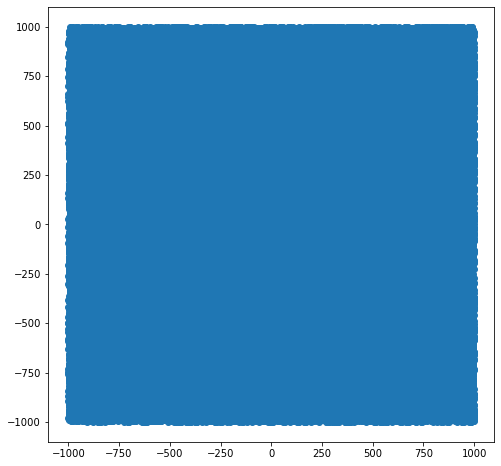

In [7]:
pointsA_x = []
pointsA_y = []
N = int(1e5)
LIMIT = int(1e3)

for _ in range(N):
    x = uniform(-pow(10, 3), pow(10, 3))
    y = uniform(-pow(10, 3), pow(10, 3))
    pointsA_x.append(x)
    pointsA_y.append(y)

adjust_plot(LIMIT)
plt.scatter(pointsA_x, pointsA_y)
plt.show()

## Generowanie punktów zbioru B)

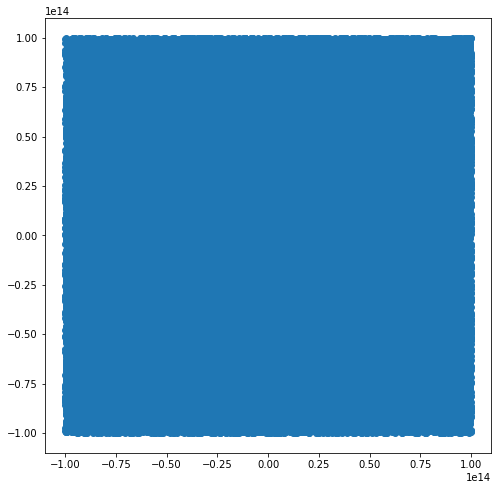

In [8]:
pointsB_x = []
pointsB_y = []
N = int(1e5)
LIMIT = int(1e14)

for _ in range(N):
    x = uniform(-pow(10, 14), pow(10, 14))
    y = uniform(-pow(10, 14), pow(10, 14))
    pointsB_x.append(x)
    pointsB_y.append(y)
adjust_plot(LIMIT)
plt.scatter(pointsB_x, pointsB_y)
plt.show()

## Generowanie punktów zbioru C)

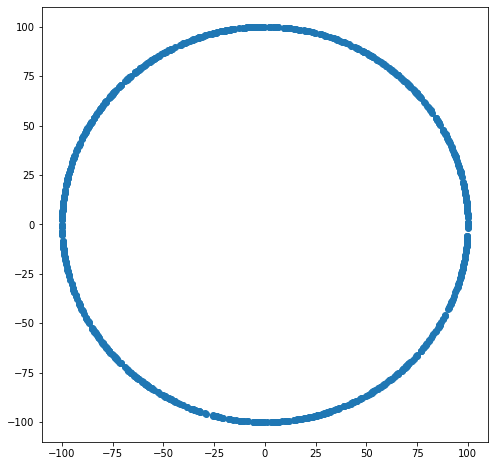

In [9]:
pointsC_x = []
pointsC_y = []
N = int(1e3)
RADIUS = 100


for _ in range(N):
    s = uniform(0, 2*np.pi)
    x = np.cos(s)*RADIUS
    y = np.sin(s)*RADIUS
    
    pointsC_x.append(x)
    pointsC_y.append(y)
    
adjust_plot(RADIUS)
plt.scatter(pointsC_x, pointsC_y)
plt.show()

## Generowanie punktów zbioru D

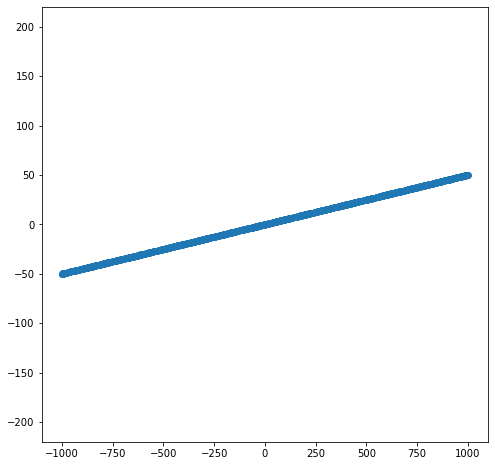

In [10]:
pointsD_x = []
pointsD_y = []
N = int(1e3)
LIMIT_X = int(1e3)
LIMIT_Y = 200

# postać prostej a*x + b
# a - nachylenie krzywej,
# b - stała

a = (A[1] - B[1]) / (A[0] - B[0])
b = A[1] - A[0] * a
for _ in range(N):
    x = uniform(-pow(10, 3), pow(10, 3))
    y = a * x + b
    pointsD_x.append(x)
    pointsD_y.append(y)

adjust_plot_2dim(LIMIT_X, LIMIT_Y)
plt.scatter(pointsD_x, pointsD_y)
plt.show()

   # Podział punktów

Funkcja group_points(X, Y) grupuje punkty na:

* leżące pod prostą wyznaczoną przez A i B (na wykresach przedstawione kolorem zielonym),
* współliniowe z tą prostą (kolor czerwony),
* leżącego nad prostą (kolor niebieski).

Taki podział wykonuje dla każdej z 4 metod liczenia wyznaczników (zaimplementowanych wyżej oraz tych pochodzących z biblioteki numpy).

In [11]:
def group_points(X, Y):
    results_x = [[[[], [], []] for t in range(3)] for det in range(4)]
    results_y = [[[[], [], []] for t in range(3)] for det in range(4)]
    
    N = len(X)
    
    for p in range(N):
        x = X[p]
        y = Y[p]
        
        matrix3d = np.array([[A[0], A[1], 1],
                            [B[0], B[1], 1],
                            [x, y, 1]])
        
        matrix2d = np.array([[A[0] - x, A[1] - y],
                             [B[0] - x, B[1] - y]])
        
        determinants = [np.linalg.det(matrix2d), det_2_x_2(matrix2d),
                        np.linalg.det(matrix3d), det_3_x_3(matrix3d)]
        
        for i in range(len(determinants)):
            for j in range(len(tolerances)):
                if abs(determinants[i]) < tolerances[j]:
                    results_x[i][j][0].append(x)
                    results_y[i][j][0].append(y)
                elif determinants[i] > 0:
                    results_x[i][j][1].append(x)
                    results_y[i][j][1].append(y)
                else:
                    results_x[i][j][2].append(x)
                    results_y[i][j][2].append(y)
                    
    return results_x, results_y

In [12]:
x1, y1 = group_points(pointsA_x, pointsA_y)
x2, y2 = group_points(pointsB_x, pointsB_y)
x3, y3 = group_points(pointsC_x, pointsC_y)
x4, y4 = group_points(pointsD_x, pointsD_y)

# Porównanie wyników ze względu na metodę liczenia wyznacznika oraz wymiar macierzy

## Zestaw A

Wyznacznik macierzy 2x2 pochodzący z biblioteki numpy

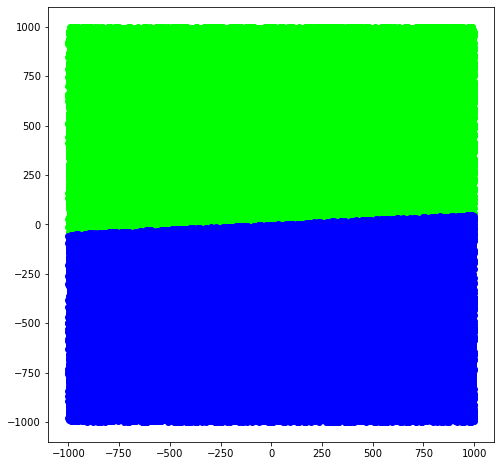

Punktów na prostej: 0
Punktów nad prostą: 49869
Punktów pod prostą: 50131


In [13]:
adjust_plot(int(1e3))
for i in range(3):
    plt.scatter(x1[0][0][i], y1[0][0][i], color = colors_categories[i]/255.0)
plt.show()


print('Punktów na prostej: ' + str(len(x1[0][0][0])))    
print('Punktów nad prostą: ' + str(len(x1[0][0][1])))
print('Punktów pod prostą: ' + str(len(x1[0][0][2])))

Wyznacznik macierzy 2x2 własnej implementacji

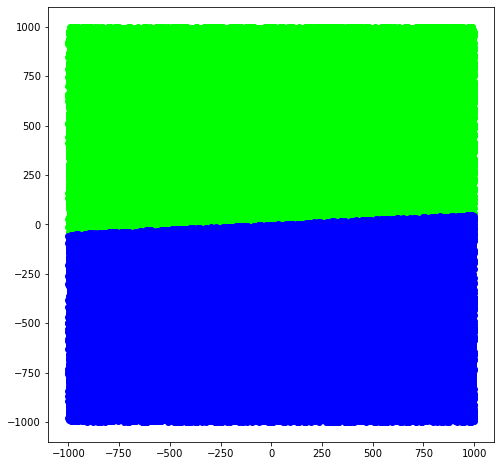

Punktów na prostej: 0
Punktów nad prostą: 49869
Punktów pod prostą: 50131


In [14]:
adjust_plot(int(1e3))
for i in range(3):
    plt.scatter(x1[1][0][i], y1[1][0][i], color = colors_categories[i]/255.0)

plt.show()

print('Punktów na prostej: ' + str(len(x1[1][0][0])))    
print('Punktów nad prostą: ' + str(len(x1[1][0][1])))
print('Punktów pod prostą: ' + str(len(x1[1][0][2])))

Wyznacznik macierzy 3x3 pochodzący z biblioteki numpy

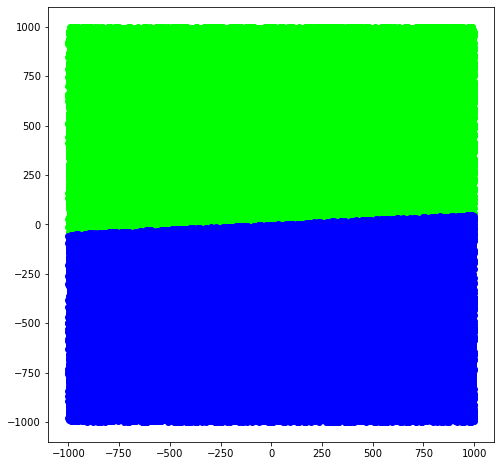

Punktów na prostej: 0
Punktów nad prostą: 49869
Punktów pod prostą: 50131


In [15]:
adjust_plot(int(1e3))
for i in range(3):
    plt.scatter(x1[2][0][i], y1[2][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x1[2][0][0])))    
print('Punktów nad prostą: ' + str(len(x1[2][0][1])))
print('Punktów pod prostą: ' + str(len(x1[2][0][2])))

Wyznacznik macierzy 3x3 własnej implementacji

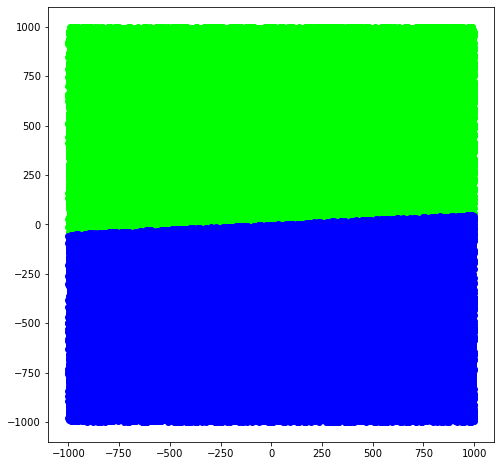

Punktów na prostej: 0
Punktów nad prostą: 49869
Punktów pod prostą: 50131


In [16]:
adjust_plot(int(1e3))
for i in range(3):
    plt.scatter(x1[3][0][i], y1[3][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x1[3][0][0])))    
print('Punktów nad prostą: ' + str(len(x1[3][0][1])))
print('Punktów pod prostą: ' + str(len(x1[3][0][2])))

# Zestaw B

Wyznacznik macierzy 2x2 pochodzący z biblioteki numpy

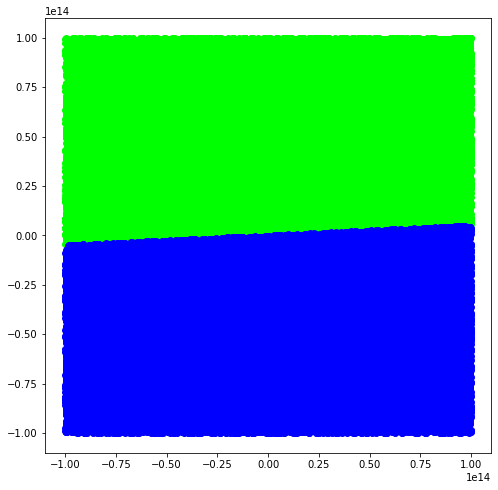

Punktów na prostej: 0
Punktów nad prostą: 49920
Punktów pod prostą: 50080


In [17]:
adjust_plot(int(1e14))
for i in range(3):
    plt.scatter(x2[0][0][i], y2[0][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x2[0][0][0])))    
print('Punktów nad prostą: ' + str(len(x2[0][0][1])))
print('Punktów pod prostą: ' + str(len(x2[0][0][2])))

Wyznacznik macierzy 2x2 własnej implementacji


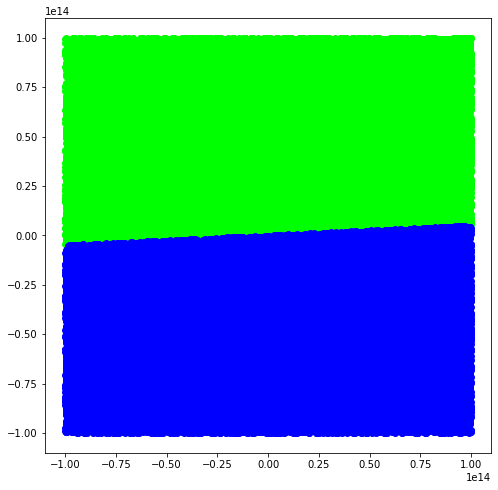

Punktów na prostej: 13
Punktów nad prostą: 49915
Punktów pod prostą: 50072


In [18]:
adjust_plot(int(1e14))
for i in range(3):
    plt.scatter(x2[1][0][i], y2[1][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x2[1][0][0])))    
print('Punktów nad prostą: ' + str(len(x2[1][0][1])))
print('Punktów pod prostą: ' + str(len(x2[1][0][2])))

Wyznacznik macierzy 3x3 pochodzący z biblioteki numpy


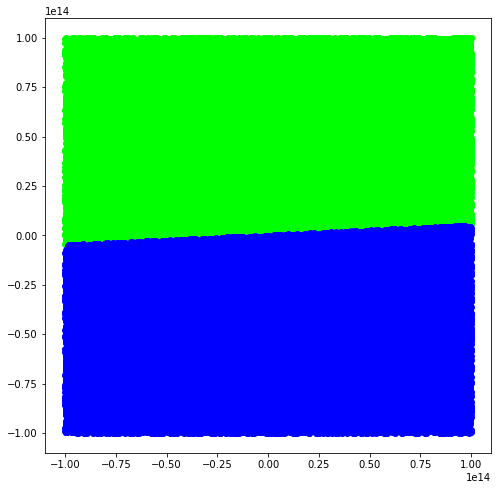

Punktów na prostej: 0
Punktów nad prostą: 49918
Punktów pod prostą: 50082


In [19]:
adjust_plot(int(1e14))
for i in range(3):
    plt.scatter(x2[2][0][i], y2[2][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x2[2][0][0])))    
print('Punktów nad prostą: ' + str(len(x2[2][0][1])))
print('Punktów pod prostą: ' + str(len(x2[2][0][2])))

Wyznacznik macierzy 3x3 własnej implementacji

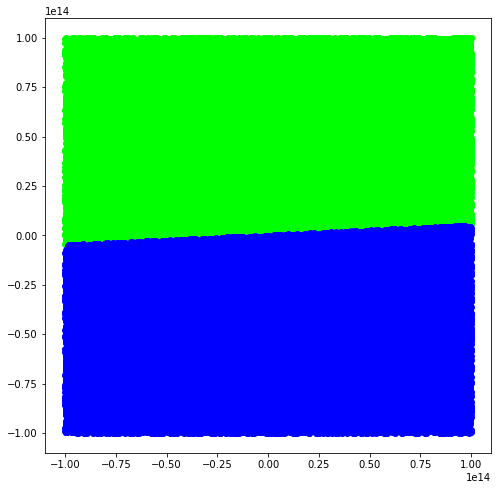

Punktów na prostej: 0
Punktów nad prostą: 49918
Punktów pod prostą: 50082


In [20]:
adjust_plot(int(1e14))
for i in range(3):
    plt.scatter(x2[3][0][i], y2[3][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x2[3][0][0])))    
print('Punktów nad prostą: ' + str(len(x2[3][0][1])))
print('Punktów pod prostą: ' + str(len(x2[3][0][2])))

# Zestaw C


Wyznacznik macierzy 2x2 pochodzący z biblioteki numpy

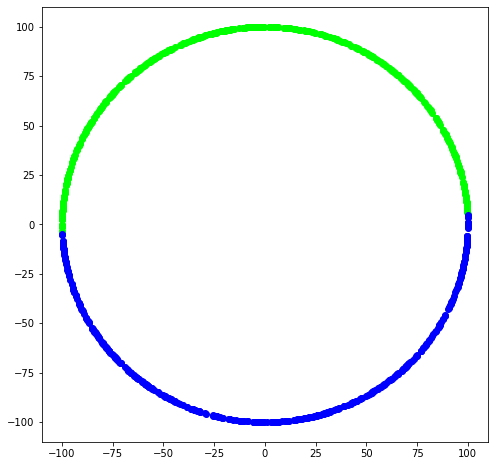

Punktów na prostej: 0
Punktów nad prostą: 527
Punktów pod prostą: 473


In [21]:
adjust_plot(RADIUS)
for i in range(3):
    plt.scatter(x3[0][0][i], y3[0][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x3[0][0][0])))    
print('Punktów nad prostą: ' + str(len(x3[0][0][1])))
print('Punktów pod prostą: ' + str(len(x3[0][0][2])))

Wyznacznik macierzy 2x2 własnej implementacji

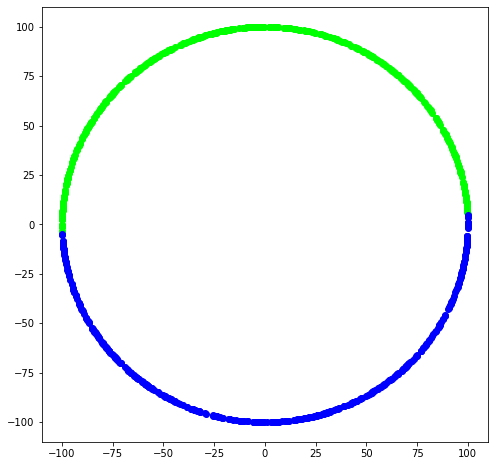

Punktów na prostej: 0
Punktów nad prostą: 527
Punktów pod prostą: 473


In [22]:
adjust_plot(RADIUS)
for i in range(3):
    plt.scatter(x3[1][0][i], y3[1][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x3[1][0][0])))    
print('Punktów nad prostą: ' + str(len(x3[1][0][1])))
print('Punktów pod prostą: ' + str(len(x3[1][0][2])))

Wyznacznik macierzy 3x3 pochodzący z biblioteki numpy

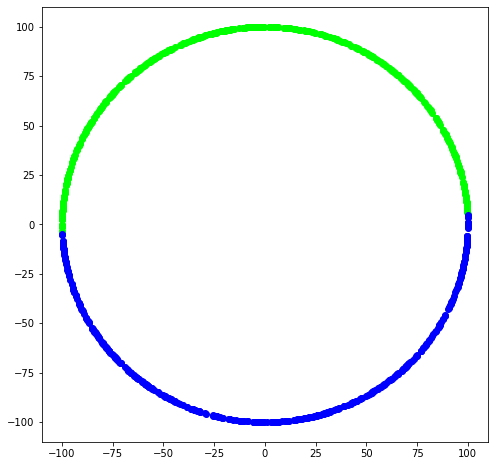

Punktów na prostej: 0
Punktów nad prostą: 527
Punktów pod prostą: 473


In [23]:
adjust_plot(RADIUS)
for i in range(3):
    plt.scatter(x3[2][0][i], y3[2][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x3[2][0][0])))    
print('Punktów nad prostą: ' + str(len(x3[2][0][1])))
print('Punktów pod prostą: ' + str(len(x3[2][0][2])))

Wyznacznik macierzy 3x3 własnej implementacji


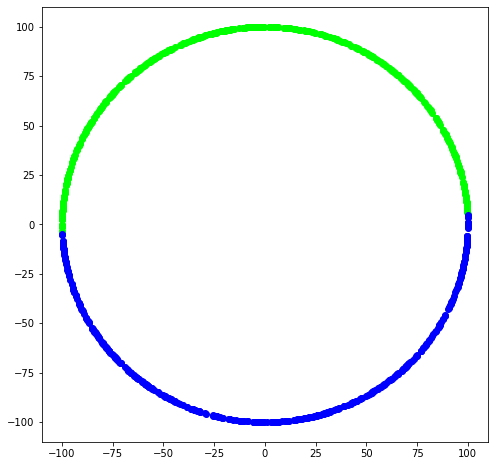

Punktów na prostej: 0
Punktów nad prostą: 527
Punktów pod prostą: 473


In [24]:
adjust_plot(RADIUS)
for i in range(3):
    plt.scatter(x3[3][0][i], y3[3][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x3[3][0][0])))    
print('Punktów nad prostą: ' + str(len(x3[3][0][1])))
print('Punktów pod prostą: ' + str(len(x3[3][0][2])))

# Zestaw D

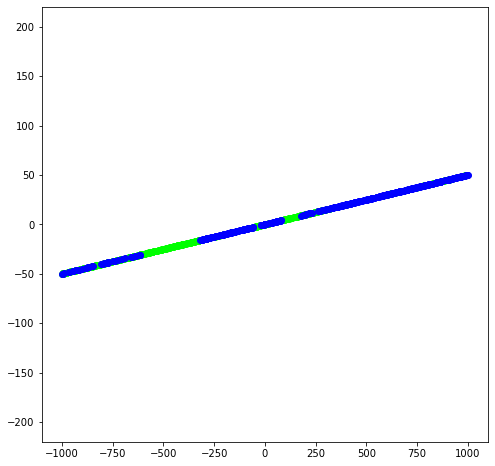

Punktów na prostej: 0
Punktów nad prostą: 487
Punktów pod prostą: 513


In [25]:
adjust_plot_2dim(LIMIT_X, LIMIT_Y)
for i in range(3):
    plt.scatter(x4[0][0][i], y4[0][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x4[0][0][0])))    
print('Punktów nad prostą: ' + str(len(x4[0][0][1])))
print('Punktów pod prostą: ' + str(len(x4[0][0][2])))

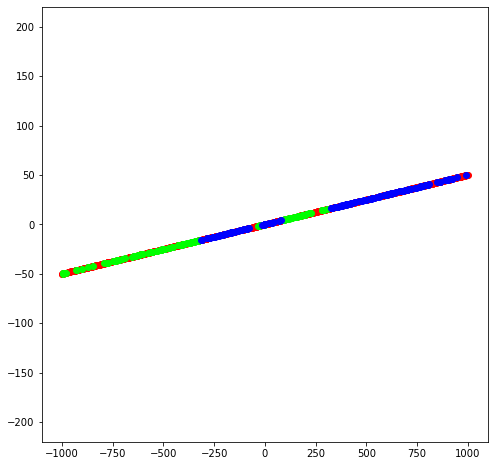

Punktów na prostej: 710
Punktów nad prostą: 137
Punktów pod prostą: 153


In [26]:
adjust_plot_2dim(LIMIT_X, LIMIT_Y)
for i in range(3):
    plt.scatter(x4[1][0][i], y4[1][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x4[1][0][0])))    
print('Punktów nad prostą: ' + str(len(x4[1][0][1])))
print('Punktów pod prostą: ' + str(len(x4[1][0][2])))

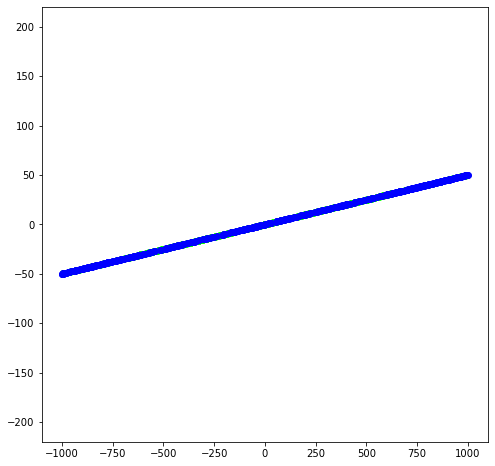

Punktów na prostej: 3
Punktów nad prostą: 475
Punktów pod prostą: 522


In [27]:
adjust_plot_2dim(LIMIT_X, LIMIT_Y)
for i in range(3):
    plt.scatter(x4[2][0][i], y4[2][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x4[2][0][0])))    
print('Punktów nad prostą: ' + str(len(x4[2][0][1])))
print('Punktów pod prostą: ' + str(len(x4[2][0][2])))

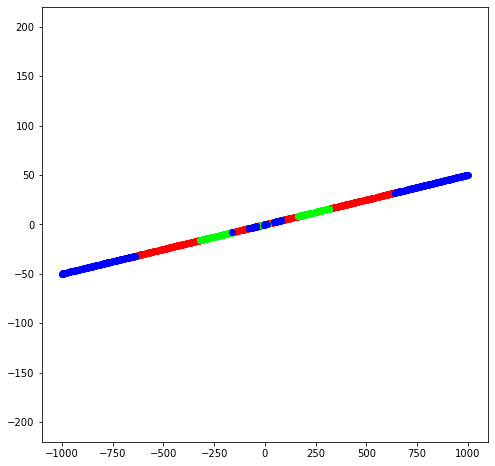

Punktów na prostej: 421
Punktów nad prostą: 173
Punktów pod prostą: 406


In [28]:
adjust_plot_2dim(LIMIT_X, LIMIT_Y)
for i in range(3):
    plt.scatter(x4[3][0][i], y4[3][0][i], color = colors_categories[i]/255.0)
    
plt.show()

print('Punktów na prostej: ' + str(len(x4[3][0][0])))    
print('Punktów nad prostą: ' + str(len(x4[3][0][1])))
print('Punktów pod prostą: ' + str(len(x4[3][0][2])))

# Różnice między zastosowanymi sposobami liczenia wyznaczników

In [29]:
def find_diff(X, Y, det1, det2, tol):
    pointsA = []
    pointsB = []
    
    len_A_under = len(X[det1][tol][2])
    len_B_under = len(X[det2][tol][2])
    len_A_above = len(X[det1][tol][1])
    len_B_above = len(X[det2][tol][1])
    len_A_linear = len(X[det1][tol][0])
    len_B_linear = len(X[det2][tol][0])
    
    for i in range(len_A_under):
        x = X[det1][tol][2][i]
        y = Y[det1][tol][2][i]
        pointsA.append(((x, y), -1))
    
    for i in range(len_B_under):
        x = X[det2][tol][2][i]
        y = Y[det2][tol][2][i]
        pointsB.append(((x, y), -1))
    
    for i in range(len_A_above):
        x = X[det1][tol][1][i]
        y = Y[det1][tol][1][i]
        pointsA.append(((x, y), 1))
    
    for i in range(len_B_above):
        x = X[det2][tol][1][i]
        y = Y[det2][tol][1][i]
        pointsB.append(((x, y), 1))
    
    for i in range(len_A_linear):
        x = X[det1][tol][0][i]
        y = Y[det1][tol][0][i]
        pointsA.append(((x, y), 0))
    
    for i in range(len_B_linear):
        x = X[det2][tol][0][i]
        y = Y[det2][tol][0][i]
        pointsB.append(((x, y), 0))
    
    pointsA.sort()
    pointsB.sort()
    
    n = len(pointsA)
    results = []
    for i in range(n):
        if pointsA[i][1] != pointsB[i][1]:
            results.append(pointsA[i][0])
    
    return results

def print_diff(x, y, det1, det2, tol, LIM):
    diff = find_diff(x, y, det1, det2, tol)
    print("Różnic: " + str(len(diff)))
    
    if len(diff) != 0:
        if type(LIM) == int:
            adjust_plot(int(LIM))
        else:
            adjust_plot_2dim(LIM[0], LIM[1])
        plt.scatter([a[0] for a in diff], [a[1] for a in diff])
        plt.show()

## Zestaw A

Wyznacznik 2x2 z biblioteki numpy oraz wyznacznik 2x2 własnej implementacji

In [30]:
print_diff(x1, y1, 0, 1, 0, 1e3)

Różnic: 0


Wyznacznik 3x3 z biblioteki numpy oraz wyznacznik 3x3 własnej implementacji

In [31]:
print_diff(x1, y1, 2, 3, 0, 1e3)

Różnic: 0


## Zestaw B

Wyznacznik 2x2 z biblioteki numpy oraz wyznacznik 2x2 własnej implementacji

Różnic: 13


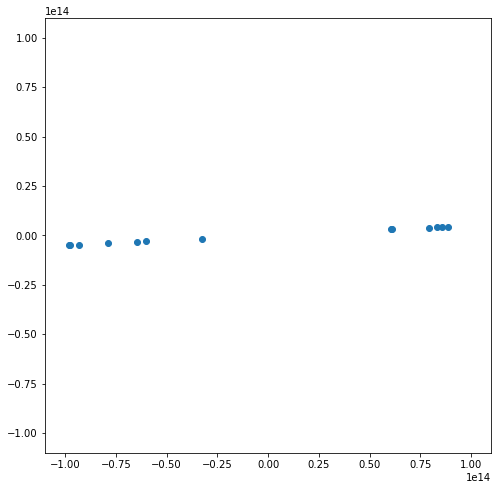

In [32]:
print_diff(x2, y2, 0, 1, 0, int(1e14))

Wyznacznik 3x3 z biblioteki numpy oraz wyznacznik 3x3 własnej implementacji


In [33]:
print_diff(x2, y2, 2, 3, 0, int(1e14))

Różnic: 0


## Zestaw C

Wyznacznik 2x2 z biblioteki numpy oraz wyznacznik 2x2 własnej implementacji


In [34]:
print_diff(x3, y3, 0, 1, 0, int(1e2))

Różnic: 0


Wyznacznik 3x3 z biblioteki numpy oraz wyznacznik 3x3 własnej implementacji


In [35]:
print_diff(x3, y3, 2, 3, 0, int(1e2))

Różnic: 0


## Zestaw D


Wyznacznik 2x2 z biblioteki numpy oraz wyznacznik 2x2 własnej implementacji


Różnic: 739


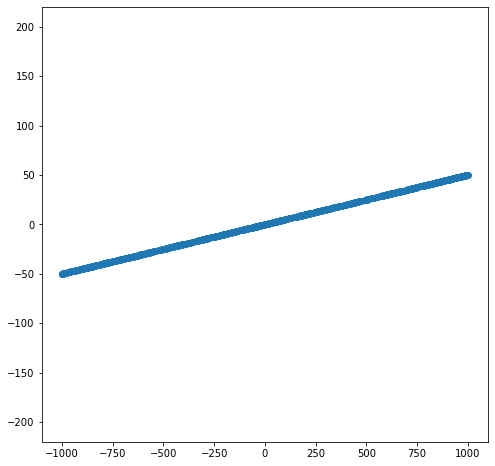

In [36]:
print_diff(x4, y4, 0, 1, 0, [LIMIT_X, LIMIT_Y])

Wyznacznik 3x3 z biblioteki numpy oraz wyznacznik 3x3 własnej implementacji

Różnic: 550


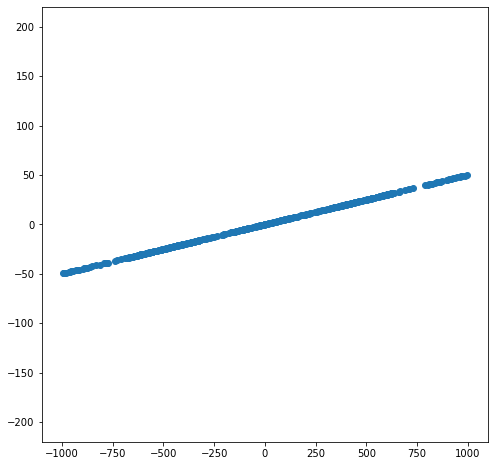

In [37]:
print_diff(x4, y4, 2, 3, 0, [LIMIT_X, LIMIT_Y])

# Porównanie kombinacji wyznaczników oraz precyzji

In [38]:
def generate_bar_diagram(x, det):
    fig, ax = plt.subplots(figsize = (12, 8))
    bar_width = 0.25
    
    under  = [len(x[det][0][2]), len(x[det][1][2]), len(x[det][2][2])]
    above  = [len(x[det][0][1]), len(x[det][1][1]), len(x[det][2][1])]
    linear = [len(x[det][0][0]), len(x[det][1][0]), len(x[det][2][0])]
    
    bar1 = np.arange(3)
    bar2 = [x + bar_width for x in bar1]
    bar3 = [x + bar_width for x in bar2]
    
    plt.bar(bar1, under, color = 'b', width = bar_width, label = 'Pod prostą', data = under)
    plt.bar(bar2, above, color = 'g', width = bar_width, label = 'Nad prostą')
    plt.bar(bar3, linear, color = 'r', width = bar_width, label = 'Na prostej')
    
    plt.xlabel('Precyzja', fontweight = 'bold', fontsize = 15)
    plt.ylabel('Liczba ', fontweight = 'bold', fontsize = 15)
    plt.xticks([(r + bar_width) for r in range(len(under))], tol_string)
    
    plt.legend()
    plt.show()
    print('                   Pod :  Nad  : Na linii')
    print('Precyzja ' + tol_string[0] + ' : ' + str(under[0]) + ' : ' + str(above[0]) + ' : ' + str(linear[0]))
    print('Precyzja ' + tol_string[1] + ' : ' + str(under[1]) + ' : ' + str(above[1]) + ' : ' + str(linear[1]))
    print('Precyzja ' + tol_string[2] + ' : ' + str(under[2]) + ' : ' + str(above[2]) + ' : ' + str(linear[2]))

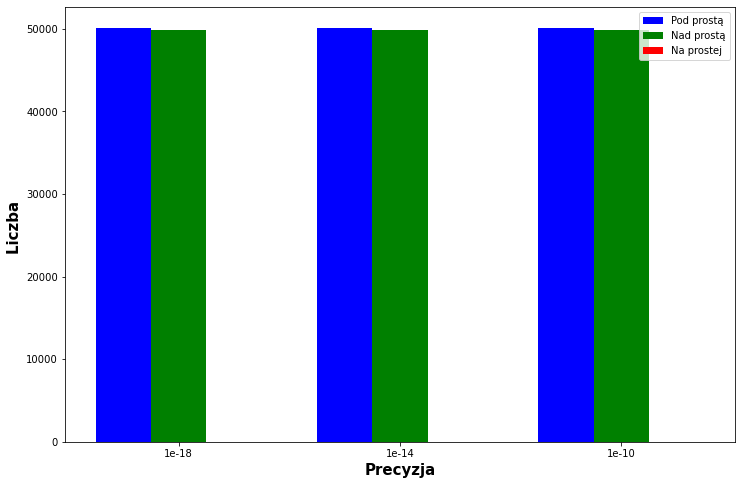

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50131 : 49869 : 0
Precyzja 1e-14 : 50131 : 49869 : 0
Precyzja 1e-10 : 50131 : 49869 : 0


In [39]:
generate_bar_diagram(x1, 0)

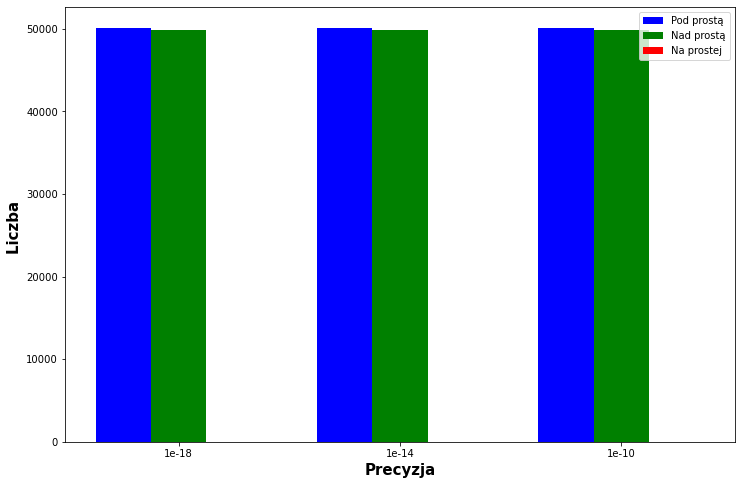

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50131 : 49869 : 0
Precyzja 1e-14 : 50131 : 49869 : 0
Precyzja 1e-10 : 50131 : 49869 : 0


In [40]:
generate_bar_diagram(x1, 1)

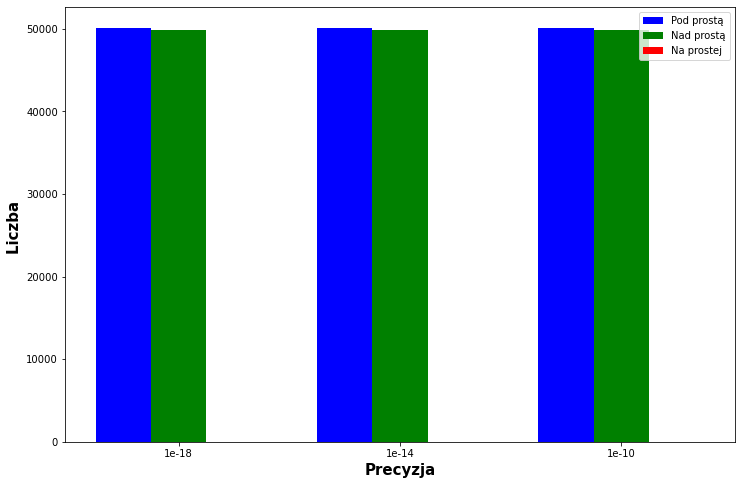

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50131 : 49869 : 0
Precyzja 1e-14 : 50131 : 49869 : 0
Precyzja 1e-10 : 50131 : 49869 : 0


In [41]:
generate_bar_diagram(x1, 2)

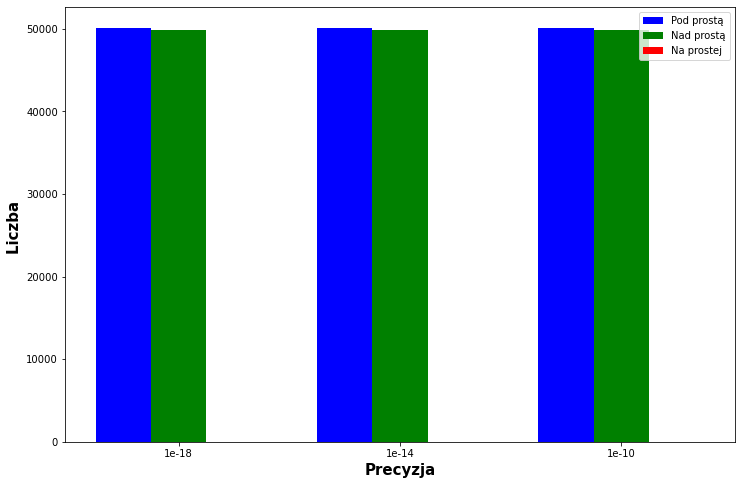

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50131 : 49869 : 0
Precyzja 1e-14 : 50131 : 49869 : 0
Precyzja 1e-10 : 50131 : 49869 : 0


In [42]:
generate_bar_diagram(x1, 3)

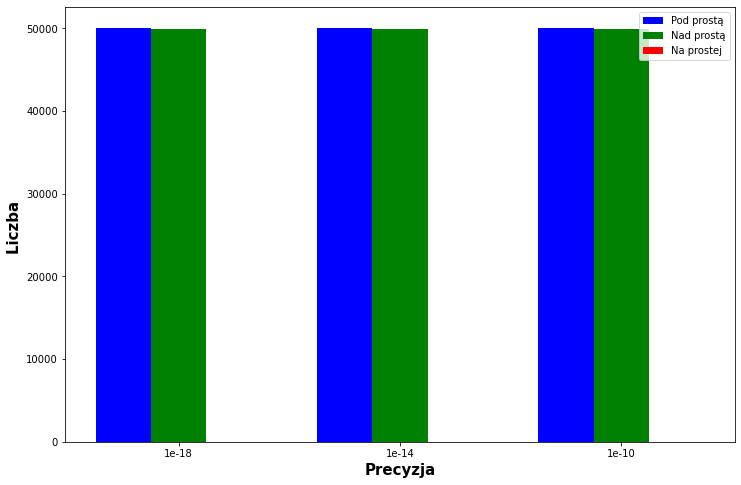

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50080 : 49920 : 0
Precyzja 1e-14 : 50080 : 49920 : 0
Precyzja 1e-10 : 50080 : 49920 : 0


In [43]:
generate_bar_diagram(x2, 0)

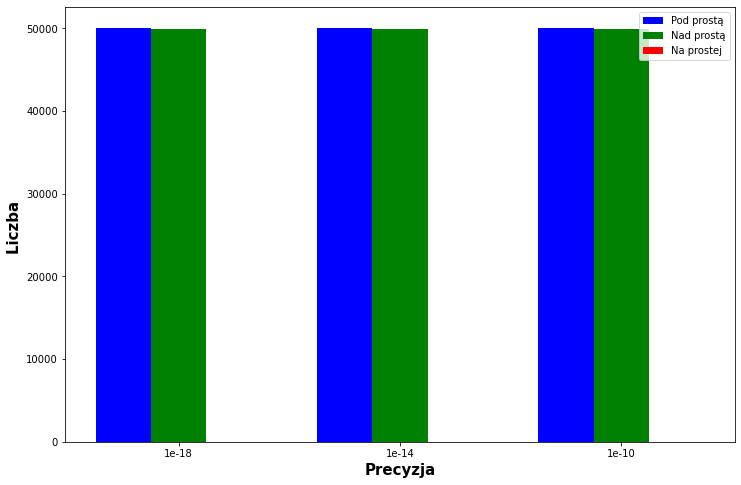

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50072 : 49915 : 13
Precyzja 1e-14 : 50072 : 49915 : 13
Precyzja 1e-10 : 50072 : 49915 : 13


In [44]:
generate_bar_diagram(x2, 1)

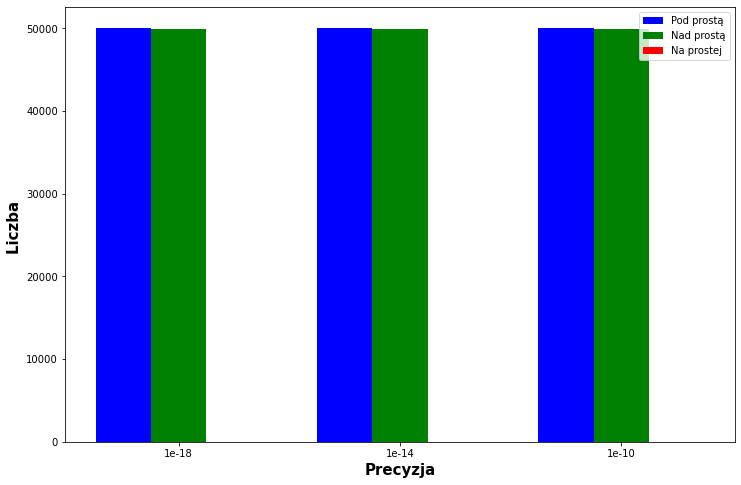

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50082 : 49918 : 0
Precyzja 1e-14 : 50082 : 49918 : 0
Precyzja 1e-10 : 50082 : 49918 : 0


In [45]:
generate_bar_diagram(x2, 2)

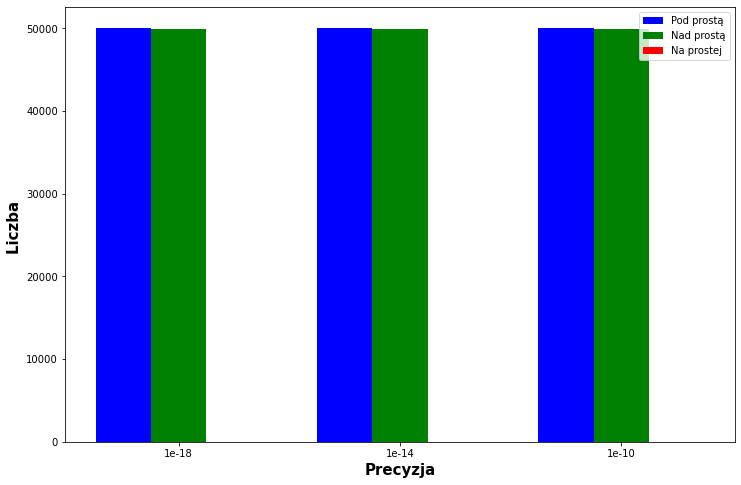

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 50082 : 49918 : 0
Precyzja 1e-14 : 50082 : 49918 : 0
Precyzja 1e-10 : 50082 : 49918 : 0


In [46]:
generate_bar_diagram(x2, 3)

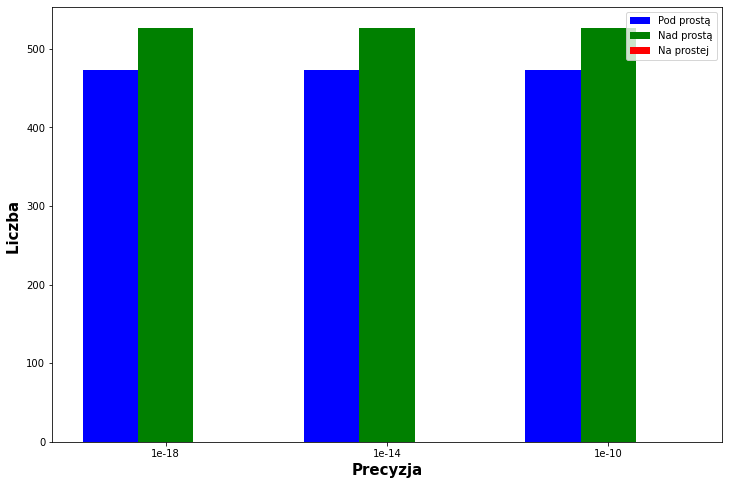

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 473 : 527 : 0
Precyzja 1e-14 : 473 : 527 : 0
Precyzja 1e-10 : 473 : 527 : 0


In [47]:
generate_bar_diagram(x3, 0)

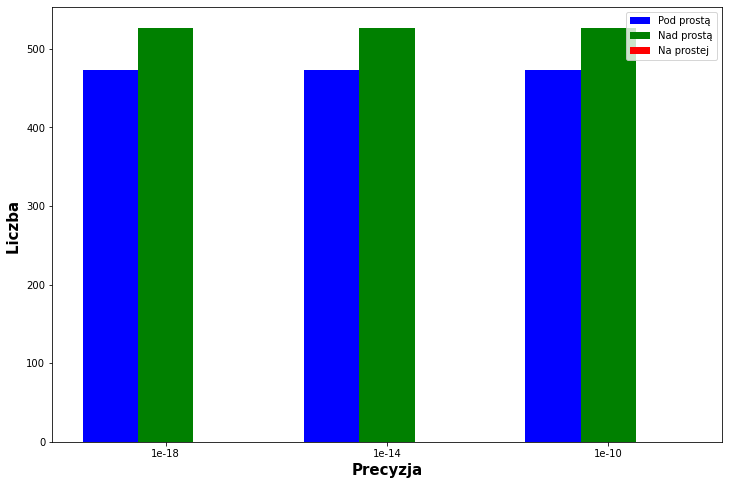

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 473 : 527 : 0
Precyzja 1e-14 : 473 : 527 : 0
Precyzja 1e-10 : 473 : 527 : 0


In [48]:
generate_bar_diagram(x3, 1)

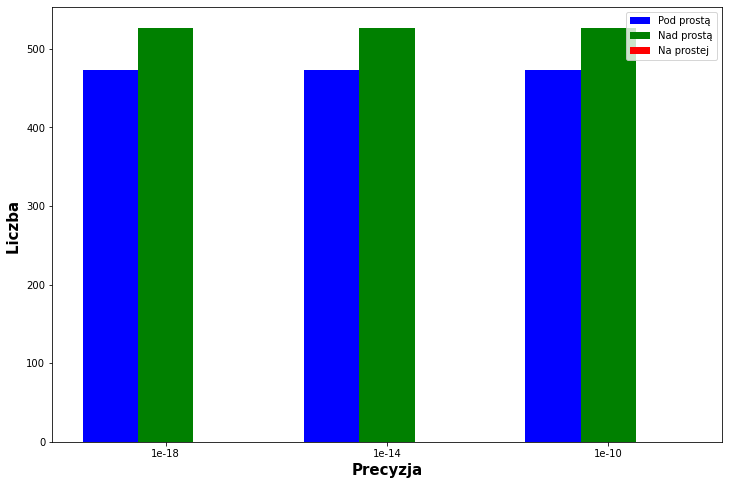

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 473 : 527 : 0
Precyzja 1e-14 : 473 : 527 : 0
Precyzja 1e-10 : 473 : 527 : 0


In [49]:
generate_bar_diagram(x3, 2)

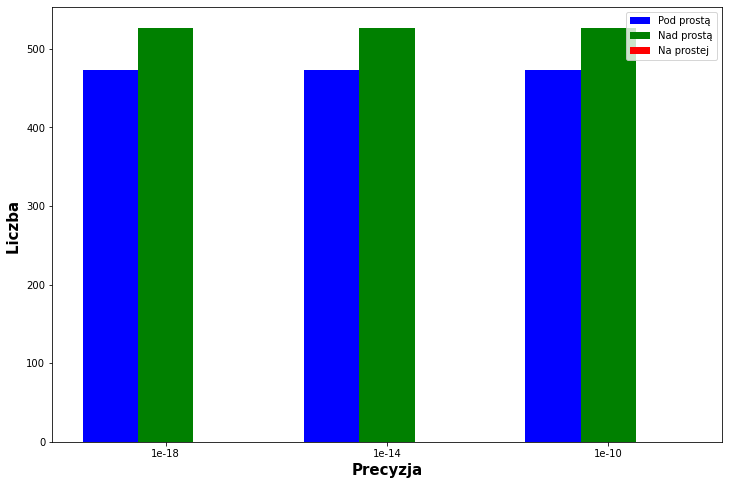

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 473 : 527 : 0
Precyzja 1e-14 : 473 : 527 : 0
Precyzja 1e-10 : 473 : 527 : 0


In [50]:
generate_bar_diagram(x3, 3)

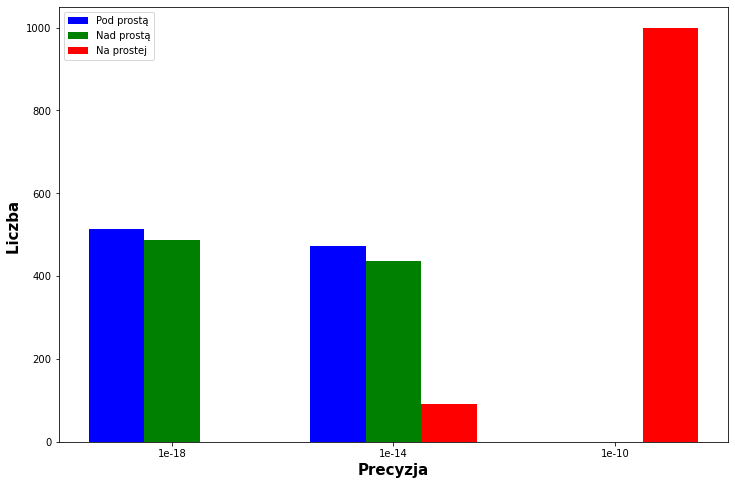

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 513 : 487 : 0
Precyzja 1e-14 : 472 : 436 : 92
Precyzja 1e-10 : 0 : 0 : 1000


In [51]:
generate_bar_diagram(x4, 0)

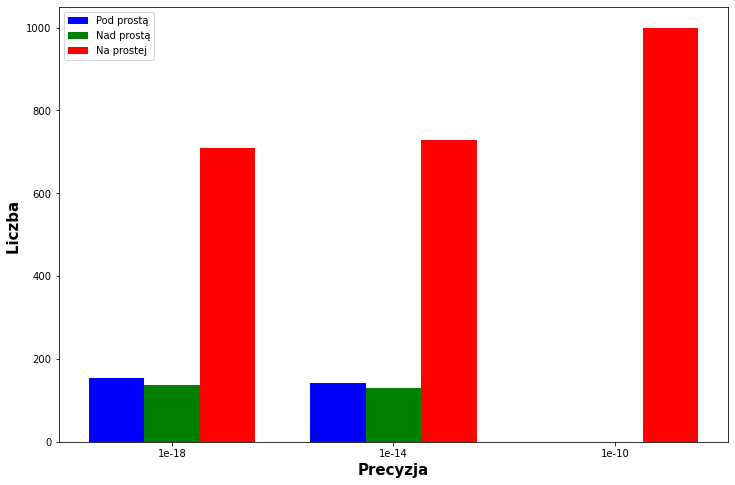

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 153 : 137 : 710
Precyzja 1e-14 : 143 : 129 : 728
Precyzja 1e-10 : 0 : 0 : 1000


In [52]:
generate_bar_diagram(x4, 1)

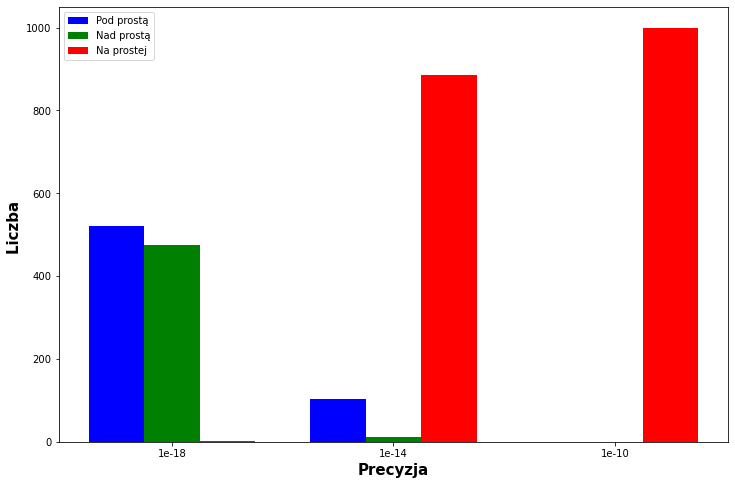

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 522 : 475 : 3
Precyzja 1e-14 : 103 : 12 : 885
Precyzja 1e-10 : 0 : 0 : 1000


In [53]:
generate_bar_diagram(x4, 2)

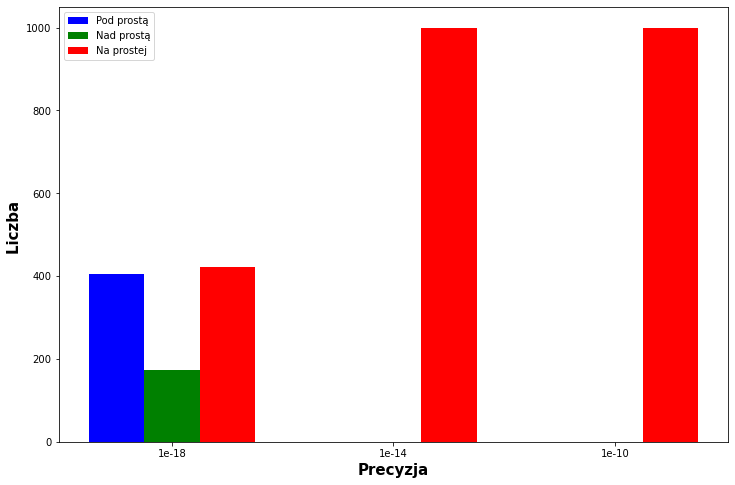

                   Pod :  Nad  : Na linii
Precyzja 1e-18 : 406 : 173 : 421
Precyzja 1e-14 : 0 : 0 : 1000
Precyzja 1e-10 : 0 : 0 : 1000


In [54]:
generate_bar_diagram(x4, 3)